### 1) Import Data

Unduh dataset yang akan digunakan pada praktikum kali ini. Anda dapat menggunakan aplikasi wget untuk mendowload dataset dan menyimpannya dalam Google Colab. Jalankan cell di bawah ini untuk mengunduh dataset

In [ ]:
! wget https://dataset-ppm.s3.amazonaws.com/iris.csv

--2021-05-10 07:13:11--  https://dataset-ppm.s3.amazonaws.com/iris.csv
Resolving dataset-ppm.s3.amazonaws.com (dataset-ppm.s3.amazonaws.com)... 52.216.25.20
Connecting to dataset-ppm.s3.amazonaws.com (dataset-ppm.s3.amazonaws.com)|52.216.25.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4609 (4.5K) [text/csv]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.50K  --.-KB/s    in 0s      

2021-05-10 07:13:12 (151 MB/s) - ‘iris.csv.1’ saved [4609/4609]



Setelah dataset berhasil diunduh, langkah berikutnya adalah membaca dataset dengan memanfaatkan fungsi **readcsv** dari library pandas. Lakukan pembacaan berkas csv ke dalam dataframe dengan nama **data** menggunakan fungsi **readcsv**. Jangan lupa untuk melakukan import library pandas terlebih dahulu


In [ ]:
import pandas as pd 
import numpy as np 
data = pd.read_csv('iris.csv')



Cek isi dataset Anda dengan menggunakan perintah **head()**

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2) Preprocessing

Sebelum dilakukan proses clustering, perlu dilakukan beberapa tahapan pemrosesan awal data. Tahapan pertama adalah memisahkan kelas data dari dataframe, karena algoritma K-Means tidak memerlukan informasi kelas. Pisahkan kelas data ke dalam sebuah variabel bernama kelas.

In [ ]:
kelas = data.pop('species')

Pada praktikum kali ini, kita akan memvisualisasikan data hasil clustering menggunakan [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). Scatter plot hanya dapat digambarkan dalam bentuk 2 dimensi, dengan demikian data yang digunakan juga hanya terdiri dari 2 fitur. Hapus fitur **petal_length** dan **petal_width** pada data, sehingga fitur yang digunakan adalah **sepal_length** dan **sepal_width**

In [ ]:
del data['petal_length']
del data['petal_width']

Salah satu tahap pada algoritma K-Means adalah perhitungan jarang Euclidean. Agar tidak ada fitur yang mendominasi pada perhitungan jarak, maka perlu dilakukan normalisasi terlebih dahulu agar rentang nilai setiap fitur sama. Implementasikan metode normalisasi min-max menggunakan fungsi bernama **minmax** pada cell di bawah ini. (Catatan : Anda pernah membuat fungsi ini di Praktikum 2)

In [ ]:
def minmax(df_input): 
  list_fitur = df_input.columns[:-1] 
  for fitur in list_fitur: 
    max = df_input[fitur].max() 
    min = df_input[fitur].min() 
    df_input[fitur] = (df_input[fitur]-min)/(max-min) 
  return df_input

Lakukan normalisasi data dan simpan hasilnya pada variabel bernama **data_normal**




In [ ]:
data_normal = minmax(data)

Tampilkan isi dataframe **data_normal**

In [ ]:
data_normal

,sepal_length,sepal_width
0,0.222222,3.5
1,0.166667,3.0
2,0.111111,3.2
3,0.083333,3.1
4,0.194444,3.6
...,...,...
145,0.666667,3.0
146,0.555556,2.5
147,0.611111,3.0
148,0.527778,3.4


## 3) Visualisasi data

Visualisasi data dilakukan untuk memahami struktur dari data. Informasi ini dapat digunakan untuk mengetahui cara pembentukan cluster yang baik. Visualisasikan **data_normal** menggunakan scatter plot. Gunakan library matplotlib.pyplot

[]

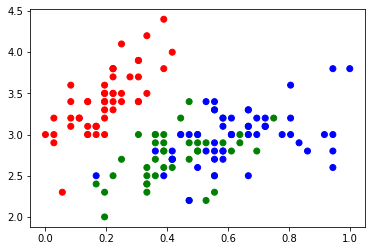

In [ ]:
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(data_normal['sepal_length'],data_normal['sepal_width'],c=kelas.map(warna)) 
plt.plot()

## 4) K-Means Clustering

Sebelum mengimplementasikan algoritma K-Means, perlu dilakukan implementasi perhitungan jarak. K-Means pada praktikum ini menggunakan perhitungan jarak Euclidean. Implementasikan perhitungan jarak Euclidean menggunakan fungsi bernama **euclidean** pada cell di bawah ini

In [ ]:
def euclidean(data1,data2):
  jarak = np.square(data1-data2)
  jarak = np.sum(jarak)

  return np.sqrt(jarak)

Langkah selanjutnya adalah implementasi algoritma K-Means. Tahapan-tahapan dalam algoritma K-Means adalah:


1.   Penentuan keanggotaan cluster secara acak
2.   Hitung centroid berdasarkan data yang ada di masing-masing cluster
3.   Alokasikan masing-masing data ke centroid terdekat
4.   Kembali ke langkah 2 selama kondisi berhenti belum terpenuhi. Iterasi berhenti jika salah satu kondisi berikut terpenuhi:
     a. Tidak ada perubahan keanggotaan cluster
     
     b. Iterasi melebihi parameter *iter_max*

Implementasikan algoritma K-Means menggunakan fungsi bernama **kmeans** pada cell di bawah ini. Fungsi **kmeans** memiliki 3 parameter input, yaitu data, K, dan iter_max



In [ ]:
from random import randint
import copy
def kmeans(data_input,k,iter_max=200):
  n_data=data_input.shape[0]
  n_fitur=data_input.shape[1]
  iter = 1
  cluster = np.array([randint(0,k-1) for i in range(n_data)])
  centroid = np.zeros((k,n_fitur))
  cluster_tidak_berubah = False
  while cluster_tidak_berubah==False and iter<iter_max:
    jarak = np.zeros((n_data,k))
    for i in range(k):
      centroid[i,:]=data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
    for i in range(n_data):
      for j in range(k):
        jarak[i][j]=euclidean(data_input.iloc[i],centroid[j])
    cluster_baru=[np.argmin(jarak[i])for i in range(n_data)]
    cluster_tidak_berubah = np.array_equal(cluster_baru,cluster)
    cluster=np.array(copy.deepcopy(cluster_baru))
    iter+=1
  return cluster

In [ ]:
cluster=kmeans(data_normal,3)

Tampilkan keanggotaan cluster pada masing-masing data


In [ ]:
print(cluster)

[1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 2 0 2 0 2 2 0 0 0 2 0 0 0
 2 2 2 2 2 0 0 0 0 0 2 1 2 0 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 2 2 2 0 2 0 1 2
 0 2 0 0 2 2 1 2 0 2 0 2 0 2 2 2 2 2 2 2 1 2 2 0 2 1 2 2 2 2 2 0 2 2 2 0 2
 1 2]


Tampilkan hasil clustering menggunaka scatter plot

[]

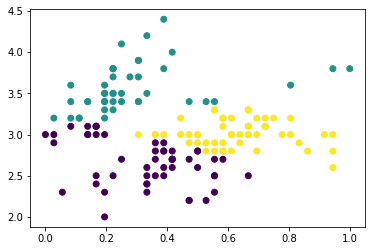

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_normal['sepal_length'],data_normal['sepal_width'],c=cluster)
plt.plot()

## TUGAS
Pada tugas kali ini Anda mengidentifikasikan pasangan fitur apa yang menghasilkan cluster yang ideal pada K-Means menggunakan data Iris.

Buatlah plot untuk setiap pasangan fitur yang mungkin.

In [ ]:
data_1 = pd.read_csv('iris.csv')
data_2 = pd.read_csv('iris.csv')
data_3 = pd.read_csv('iris.csv')
data_4 = pd.read_csv('iris.csv')
data_5 = pd.read_csv('iris.csv')

In [ ]:
kelas_1 = data_1.pop('species')
kelas_2 = data_2.pop('species')
kelas_3 = data_3.pop('species')
kelas_4 = data_4.pop('species')
kelas_5 = data_5.pop('species')

In [ ]:
del data_1['sepal_length']
del data_1['sepal_width']

In [ ]:
del data_2['petal_length']
del data_2['sepal_length']

In [ ]:
del data_3['sepal_width']
del data_3['petal_width']

In [ ]:
del data_4['sepal_width']
del data_4['petal_length']

In [ ]:
del data_5['sepal_length']
del data_5['petal_width']

In [ ]:
data_1

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
data_2

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [ ]:
data_3

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
data_4

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [ ]:
data_5

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [ ]:
normal_1 = minmax(data_1)
normal_2 = minmax(data_2)
normal_3 = minmax(data_3)
normal_4 = minmax(data_4)
normal_5 = minmax(data_5)

[]

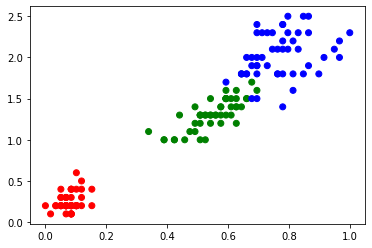

In [ ]:
#data normal_1
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(normal_1['petal_length'],normal_1['petal_width'],c=kelas_1.map(warna)) 
plt.plot()

[]

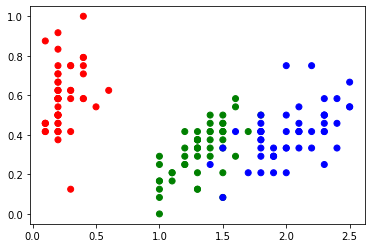

In [ ]:
#data normal_2
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(normal_2['petal_width'],normal_2['sepal_width'],c=kelas_2.map(warna)) 
plt.plot()

[]

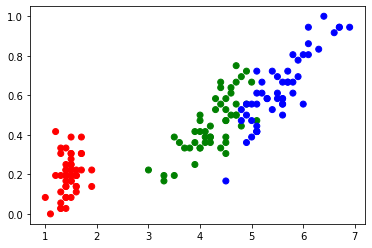

In [ ]:
#data normal_3
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(normal_3['petal_length'],normal_3['sepal_length'],c=kelas_3.map(warna)) 
plt.plot()

[]

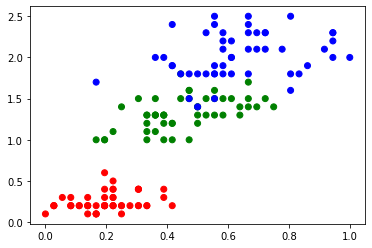

In [ ]:
#data normal_4
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(normal_4['sepal_length'],normal_4['petal_width'],c=kelas_4.map(warna)) 
plt.plot()

[]

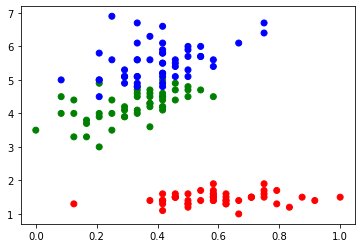

In [ ]:
#data normal_5
import matplotlib.pyplot as plt 
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'} 
plt.scatter(normal_5['sepal_width'],normal_5['petal_length'],c=kelas_5.map(warna)) 
plt.plot()

Identifikasikan pasangan fitur apa yang dapat membedakan ketiga kelas dengan baik

Dapat dilihat bahwa ada 5 pasangan tambahan yang menjadi bahan praktikum untuk dilakukan ploting ini yakni:
1. normal_1 (petal_length dan petal_width)
2. normal_2 (petal_width dan sepal_width)
3. normal_3 (petal_length dan sepal_length)
4. normal_4 (sepal_length dan petal_width)
5. normal_5 (sepal_width dan petal_length)

Dari kelima pasangan yang dibuat ini dapat dilihat pada hasil plotnya adalah data normal_4 yang memiliki hasil yang terbaik karena warna - warna yang merepresentasikan kelasnya terpisah dengan baik dan hanya sedikit sekali yang bercampur. 

Lakukan clustering menggunakan K-Means dengan k=3, apakah cluster yang dihasilkan juga terpisah dengan baik? Gunakan scatter plot untuk melihat hasil clustering

In [ ]:
cluster_1=kmeans(normal_1,3)
print(cluster_1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[]

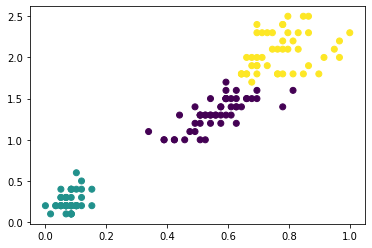

In [ ]:
plt.scatter(normal_1['petal_length'],normal_1['petal_width'],c=cluster_1)
plt.plot()

In [ ]:
cluster_2=kmeans(normal_2,3)
print(cluster_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[]

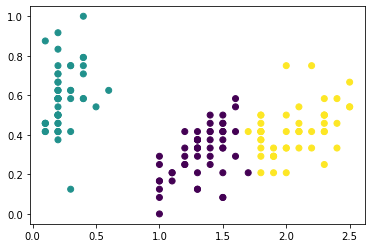

In [ ]:
plt.scatter(normal_2['petal_width'],normal_2['sepal_width'],c=cluster_2) 
plt.plot()

In [ ]:
cluster_3=kmeans(normal_3,3)
print(cluster_3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


[]

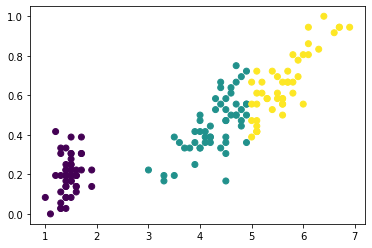

In [ ]:
plt.scatter(normal_3['petal_length'],normal_3['sepal_length'],c=cluster_3) 
plt.plot()

In [ ]:
cluster_4=kmeans(normal_4,3)
print(cluster_4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


[]

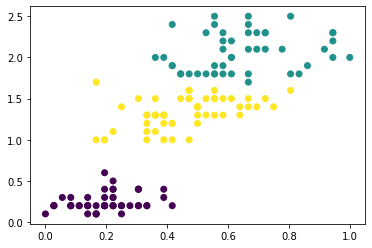

In [ ]:
plt.scatter(normal_4['sepal_length'],normal_4['petal_width'],c=cluster_4) 
plt.plot()

In [ ]:
cluster_5=kmeans(normal_5,3)
print(cluster_5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


[]

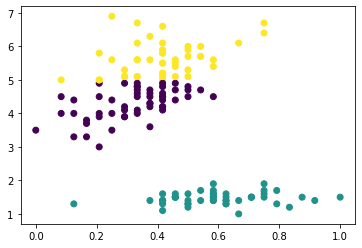

In [ ]:
plt.scatter(normal_5['sepal_width'],normal_5['petal_length'],c=cluster_5) 
plt.plot()

[Apakah hasilnya baik? Mengapa?]

Dapat dilihat bahwa clustering dilakukan terhadap kelima pasangan tersebut dimana:
1. cluster_1 mengambil data normal_1 dengan k = 3
2. cluster_2 mengambil data normal_2 dengan k = 3
3. cluster_3 mengambil data normal_3 dengan k = 3
4. cluster_4 mengambil data normal_4 dengan k = 3
5. cluster_5 mengambil data normal_5 dengan k = 3


Dari hasil clustering tersebut dapat dilihat bahwa hasil terbaik yang diperoleh adalah pada cluster_4 dan terbaik setelahnya ada pada cluster_2 karena pada plot dapat dilihat warna yang merepresentasikan kelasnya sangat terpisah dan tidak bercampuran. 

Dapat dilihat pula perbedaan antara plot sebelum melakukan clustering dan setelah melakukan clustering bahwa hasilnya lebih baik setelah melakukan clustering.


K-Means Clustering bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya juga bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. 

K disini merupakan jumlah cluster yang diinginkan, dan pada praktikum ini menggunakan K = 3.